In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from epitools import get_data

In [32]:
df_ep = get_data(
    country="Germany",
    year=2021,
    aggregation="nuts_1",
    election="general"
)

df_ep = df_ep.rename(columns={"nuts_1": "region_id"})
df_ep.head()

,region_id,ec,ep,year
0,DE1,0.790125,0.151394,2021
1,DE2,0.645986,0.174705,2021
2,DE4,0.765970,0.154723,2021
3,DE5,0.731769,0.164761,2021
4,DE7,0.817463,0.177782,2021


In [30]:
df_mp = pd.read_csv("data_cses/CHL_2017.csv")
df_mp = df_mp[df_mp["value"] > 0]
df_mp["region_id"] = df_mp["region_id"].replace({
    1: "DE1",
    2: "DE2",
    3: "DE3",
    4: "DE4",
    5: "DE5",
    6: "DE6",
    7: "DE7",
    8: "DE8",
    9: "DE9",
    10: "DEA",
    11: "DEB",
    12: "DEC",
    13: "DED",
    14: "DEE",
    15: "DEF",
    16: "DEG"
})
df_mp["n"] = df_mp["n"].astype(int)
df_mp

,region_id,value,n
0,DE1,2.430029,33
1,DE2,2.167647,65
2,DE3,1.869422,25
3,DE4,1.513673,102
4,DE5,1.908459,260
5,DE6,2.052704,97
6,DE7,2.006599,66
7,DE8,1.092131,246
8,DE9,1.768222,86
9,DEA,1.676759,86


In [34]:
pd.merge(df_ep, df_mp, on="region_id").corr()

C:\Users\cnava\AppData\Local\Temp\ipykernel_21636\3277159966.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.merge(df_ep, df_mp, on="region_id").corr()


,ec,ep,year,value,n
ec,1.000000,-0.315746,NaN,-0.162537,-0.160991
ep,-0.315746,1.000000,NaN,0.131097,0.455844
year,NaN,NaN,NaN,NaN,NaN
value,-0.162537,0.131097,NaN,1.000000,0.043666
n,-0.160991,0.455844,NaN,0.043666,1.000000


<AxesSubplot: xlabel='value', ylabel='ep'>

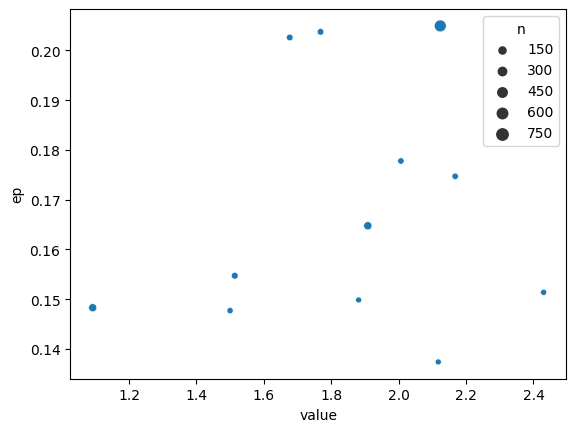

In [33]:
sns.scatterplot(x="value", y="ep", size="n", data=pd.merge(df_ep, df_mp, on="region_id"))